In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from d2l import torch as d2l


Loading Data

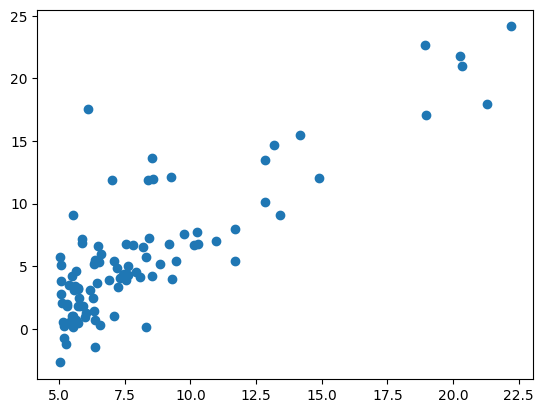

In [48]:
data = pd.read_csv("./data.csv")
plt.scatter(data.x1, data.x2)

In [14]:
def loss_function(m, b, data) -> float:
    total_loss = 0
    for i in range(len(data)):
        x1 = data.x1[i]
        x2 = data.x2[i]
        # Loss function is E = 1/n * sum((y - (mx + b))^2)
        total_loss += (x2 - (m * x1 + b))**2
        return total_loss / float(len(data))

In [15]:
def gradient_descent(m_current, b_current, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = len(data)

    for i in range(N):
        # alternatively use data.iloc[i].x1 and data.iloc[i].x2
        x = data.x1[i] 
        y = data.x2[i]
        m_gradient += -(2/N) * x * (y - (m_current * x + b_current))
        b_gradient += -(2/N) * (y - (m_current * x + b_current))

    # update m and b
    m = m_current - (learning_rate * m_gradient)
    b = b_current - (learning_rate * b_gradient)

    return m, b


In [49]:
# test gradient descent
m = 0
b = 0
learning_rate = 0.001
epochs = 100000


In [50]:
for i in range(epochs):
    m, b = gradient_descent(m, b, data, learning_rate)
    if i % 1000 == 0:
        print(f"Epoch: {int(i / 1000)}, Loss: {loss_function(m, b, data):.5f}, m: {m:.5f}, b: {b:.5f}")
print(f"m: {m:.5f}, b: {b:.5f}")

Epoch: 0, Loss: 2.90346, m: 0.13066, b: 0.01168
Epoch: 1, Loss: 1.77678, m: 0.91466, b: -1.12478
Epoch: 2, Loss: 1.86555, m: 0.99893, b: -1.96365
Epoch: 3, Loss: 1.92873, m: 1.05769, b: -2.54856
Epoch: 4, Loss: 1.97340, m: 1.09866, b: -2.95641
Epoch: 5, Loss: 2.00486, m: 1.12723, b: -3.24079
Epoch: 6, Loss: 2.02693, m: 1.14715, b: -3.43907
Epoch: 7, Loss: 2.04240, m: 1.16104, b: -3.57733
Epoch: 8, Loss: 2.05322, m: 1.17073, b: -3.67374
Epoch: 9, Loss: 2.06078, m: 1.17748, b: -3.74096
Epoch: 10, Loss: 2.06606, m: 1.18219, b: -3.78783
Epoch: 11, Loss: 2.06974, m: 1.18547, b: -3.82051
Epoch: 12, Loss: 2.07231, m: 1.18776, b: -3.84330
Epoch: 13, Loss: 2.07411, m: 1.18936, b: -3.85918
Epoch: 14, Loss: 2.07536, m: 1.19047, b: -3.87026
Epoch: 15, Loss: 2.07623, m: 1.19125, b: -3.87799
Epoch: 16, Loss: 2.07684, m: 1.19179, b: -3.88337
Epoch: 17, Loss: 2.07727, m: 1.19216, b: -3.88713
Epoch: 18, Loss: 2.07756, m: 1.19243, b: -3.88975
Epoch: 19, Loss: 2.07777, m: 1.19261, b: -3.89158
Epoch: 20, 

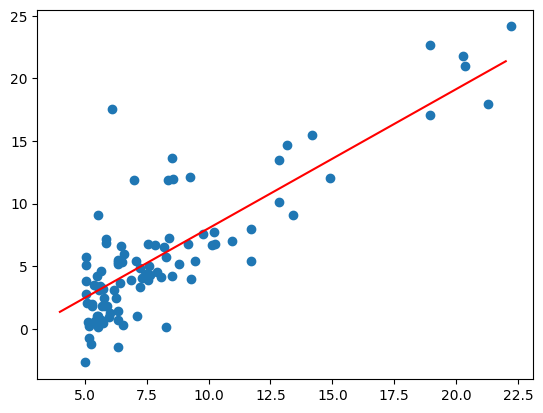

In [42]:
plt.scatter(data.x1, data.x2)
plt.plot(list(range(4, 23)), 
         [m * x + b for x in range(4, 23)], 
         color='red')
plt.show()
